In [4]:
!pip install scikit-learn
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [7]:
# load the dataset
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


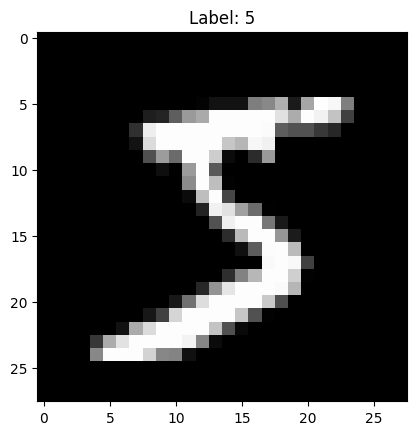

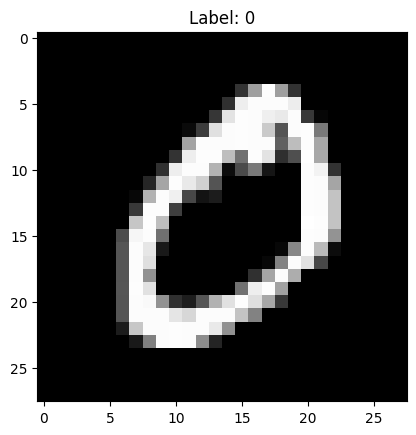

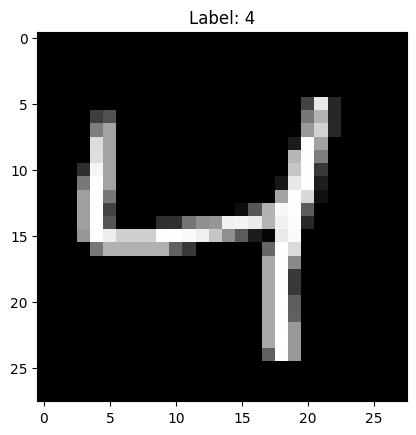

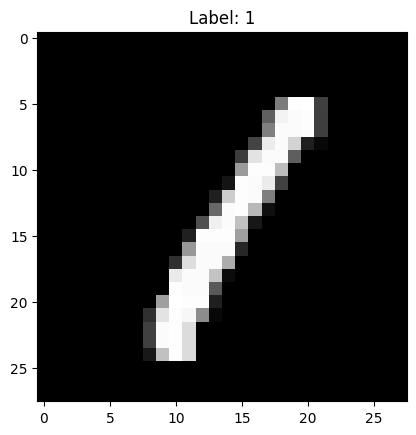

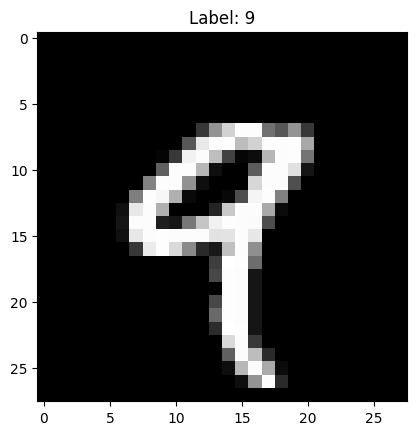

In [9]:
# display the first 5 images
for i in range(5):
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.show()

In [10]:
# Data Preporcessing

# normalize training set so it has values 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# flatten the training dataset
X_train = X_train.reshape(X_train.shape[0], 28*28) # 28 x 28 picels = 784
X_test = X_test.reshape(X_test.shape[0], 28*28)

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [32]:
# build the neural network

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [33]:
# compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8601 - loss: 0.4809 - val_accuracy: 0.9625 - val_loss: 0.1342
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9653 - loss: 0.1184 - val_accuracy: 0.9689 - val_loss: 0.1082
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9767 - loss: 0.0744 - val_accuracy: 0.9684 - val_loss: 0.1065
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9827 - loss: 0.0564 - val_accuracy: 0.9734 - val_loss: 0.0945
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9885 - loss: 0.0382 - val_accuracy: 0.9697 - val_loss: 0.1026
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9908 - loss: 0.0308 - val_accuracy: 0.9737 - val_loss: 0.1000
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.9747 - val_loss: 0.1025
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9928 - loss: 0.0216 - 

In [34]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.9689 - loss: 0.1275
Test Accuracy: 97.34%


In [26]:
# Let's try improving model by changing architecture and adding dropout layer
model_2 = keras.Sequential ([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [27]:
# compile and train
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8120 - loss: 0.5942 - val_accuracy: 0.9556 - val_loss: 0.1460
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9470 - loss: 0.1761 - val_accuracy: 0.9668 - val_loss: 0.1130
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9614 - loss: 0.1299 - val_accuracy: 0.9720 - val_loss: 0.1000
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9663 - loss: 0.1115 - val_accuracy: 0.9737 - val_loss: 0.0901
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9700 - loss: 0.0995 - val_accuracy: 0.9744 - val_loss: 0.0927
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9732 - loss: 0.0883 - val_accuracy: 0.9722 - val_loss: 0.0922
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9767 - loss: 0.0764 - val_accuracy: 0.9753 - val_loss: 0.0916
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9768 - loss: 0.0740 - 

In [28]:
test_loss, test_accuracy = model_2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.9732 - loss: 0.1042 
Test Accuracy: 97.77%


In [39]:
# Let's try improving model by changing architecture and adding dropout layer
model_3 = keras.Sequential ([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# lets try Adam with a different learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model_3.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7996 - loss: 0.6142 - val_accuracy: 0.9600 - val_loss: 0.1370
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9464 - loss: 0.1789 - val_accuracy: 0.9662 - val_loss: 0.1103
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9585 - loss: 0.1344 - val_accuracy: 0.9715 - val_loss: 0.0982
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9659 - loss: 0.1124 - val_accuracy: 0.9731 - val_loss: 0.0931
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9703 - loss: 0.0998 - val_accuracy: 0.9746 - val_loss: 0.0911
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9716 - loss: 0.0893 - val_accuracy: 0.9763 - val_loss: 0.0913
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9762 - loss: 0.0759 - val_accuracy: 0.9724 - val_loss: 0.1011
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9770 - loss: 0.0737 - 

In [40]:
test_loss, test_accuracy = model_3.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.9748 - loss: 0.0850 
Test Accuracy: 97.98%
